In [12]:
import pandas as pd
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import roc_curve, auc
from sklearn.decomposition import PCA
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import spacy
import numpy as np
from spacy.matcher import Matcher
from spacy.matcher import Matcher 
from spacy.matcher import PhraseMatcher
from skillNer.general_params import SKILL_DB
from skillNer.skill_extractor_class import SkillExtractor
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics  import accuracy_score
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.svm import SVC
import warnings
nlp = spacy.load('en_core_web_lg')
matcher = Matcher(nlp.vocab)

warnings.simplefilter(action='ignore', category=FutureWarning)
%matplotlib inline

In [13]:
df = pd.read_excel('dataset_final.xlsx')
df3 = pd.read_excel('dataset_experiences.xlsx')
df4 = pd.read_excel('output_experiences.xlsx')

# Concaténer les datasets
df_combined = pd.concat([df, df3 , df4], ignore_index=True)

In [14]:
df_combined.shape

(50744, 11)

In [15]:
df_combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50744 entries, 0 to 50743
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   experiences           50744 non-null  object 
 1   Verbs number          50740 non-null  float64
 2   Adjectives number     50740 non-null  float64
 3   Stopwords number      50740 non-null  float64
 4   Sentence length       50740 non-null  float64
 5   Nouns number          50740 non-null  float64
 6   Special chars number  50740 non-null  float64
 7   Punctuation number    50740 non-null  float64
 8   Digits number         50740 non-null  float64
 9   Skills number         50740 non-null  float64
 10  IsExperience          50744 non-null  object 
dtypes: float64(9), object(2)
memory usage: 4.3+ MB


In [16]:
df_combined.columns

Index(['experiences', 'Verbs number', 'Adjectives number', 'Stopwords number',
       'Sentence length', 'Nouns number', 'Special chars number',
       'Punctuation number', 'Digits number', 'Skills number', 'IsExperience'],
      dtype='object')

In [17]:
df_combined.head()

,experiences,Verbs number,Adjectives number,Stopwords number,Sentence length,Nouns number,Special chars number,Punctuation number,Digits number,Skills number,IsExperience
0,How many years' experience do you have as a Da...,1.0,1.0,7.0,13.0,2.0,0.0,2.0,0.0,1.0,YES
1,"be, co that says",1.0,0.0,2.0,5.0,1.0,0.0,1.0,0.0,0.0,NO
2,"a good team player, motivated by team and comp...",2.0,2.0,5.0,16.0,6.0,0.0,2.0,0.0,0.0,YES
3,", or equivalent professional experience",0.0,2.0,1.0,5.0,1.0,0.0,1.0,0.0,0.0,YES
4,It is old lets up,1.0,1.0,3.0,5.0,0.0,0.0,0.0,0.0,0.0,NO


In [18]:
df_combined.tail()

,experiences,Verbs number,Adjectives number,Stopwords number,Sentence length,Nouns number,Special chars number,Punctuation number,Digits number,Skills number,IsExperience
50739,What's your expected monthly basic salary?,1.0,2.0,3.0,8.0,1.0,1.0,1.0,0.0,0.0,YES
50740,How would you rate your Mandarin language skills?,1.0,0.0,4.0,9.0,2.0,0.0,1.0,0.0,0.0,YES
50741,Are you available for shift work?,0.0,1.0,3.0,7.0,2.0,0.0,1.0,0.0,0.0,YES
50742,What's your expected monthly basic salary?,1.0,2.0,3.0,8.0,1.0,1.0,1.0,0.0,0.0,YES
50743,How many years' experience do you have as a Di...,1.0,1.0,7.0,13.0,4.0,0.0,2.0,0.0,0.0,YES


In [19]:
df_combined.describe()

,Verbs number,Adjectives number,Stopwords number,Sentence length,Nouns number,Special chars number,Punctuation number,Digits number,Skills number
count,50740.000000,50740.000000,50740.000000,50740.000000,50740.000000,50740.000000,50740.000000,50740.000000,50740.000000
mean,1.173827,0.909381,3.289022,11.390146,3.103705,0.212081,1.598916,0.114032,1.259657
std,1.314668,1.154456,2.702901,7.570392,2.995251,0.751235,1.812418,0.417219,1.712983
min,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,1.000000,6.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,1.000000,3.000000,10.000000,2.000000,0.000000,1.000000,0.000000,1.000000
75%,2.000000,1.000000,5.000000,15.000000,5.000000,0.000000,2.000000,0.000000,2.000000
max,20.000000,9.000000,42.000000,63.000000,24.000000,10.000000,25.000000,8.000000,14.000000


In [20]:
df_combined.isna().sum()

experiences             0
Verbs number            4
Adjectives number       4
Stopwords number        4
Sentence length         4
Nouns number            4
Special chars number    4
Punctuation number      4
Digits number           4
Skills number           4
IsExperience            0
dtype: int64

In [21]:
df_combined.describe(include=['object'])

,experiences,IsExperience
count,50744,50744
unique,11412,2
top,What's your expected monthly basic salary?,YES
freq,810,32944


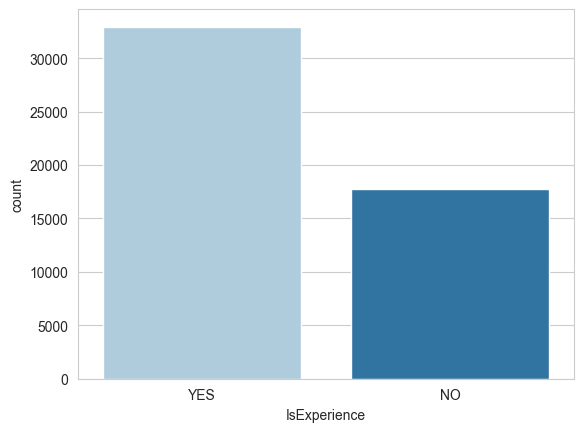

In [22]:
# Groupement Label 
sns.set_style('whitegrid')
custom_palette = sns.color_palette("Paired", len(df_combined['IsExperience'].unique()))
sns.countplot(x='IsExperience', data=df_combined, palette=custom_palette)
plt.show()

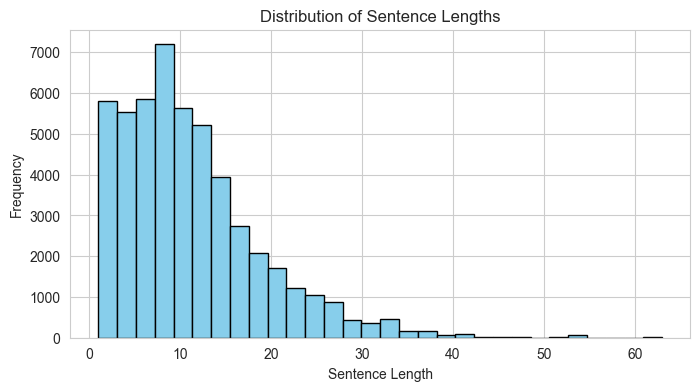

In [23]:
#Frequency de Sentence Length
data = df_combined['Sentence length']

plt.figure(figsize=(8, 4))
plt.hist(data, bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Sentence Length')
plt.ylabel('Frequency')
plt.title('Distribution of Sentence Lengths')
plt.show()

<Axes: xlabel='IsExperience', ylabel='Sentence length'>

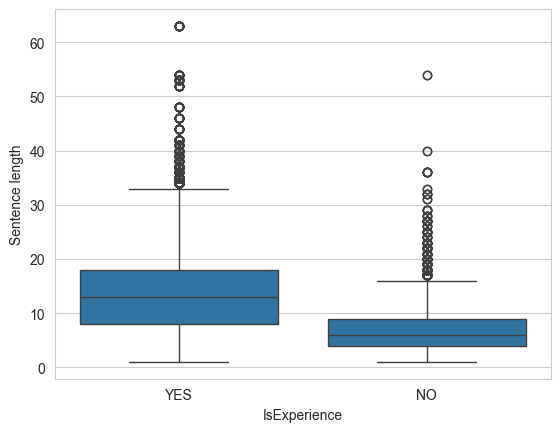

In [24]:
sns.boxplot(y='Sentence length',x='IsExperience',data=df_combined)

                      Verbs number  Adjectives number  Stopwords number  \
Verbs number              1.000000           0.276767          0.554263   
Adjectives number         0.276767           1.000000          0.379908   
Stopwords number          0.554263           0.379908          1.000000   
Sentence length           0.605280           0.515103          0.699054   
Nouns number              0.482844           0.396187          0.458902   
Special chars number      0.054727           0.079405          0.084385   
Punctuation number        0.244501           0.272501          0.242617   
Digits number            -0.156115          -0.096840         -0.100497   
Skills number             0.333217           0.374109          0.261487   

                      Sentence length  Nouns number  Special chars number  \
Verbs number                 0.605280      0.482844              0.054727   
Adjectives number            0.515103      0.396187              0.079405   
Stopwords number  

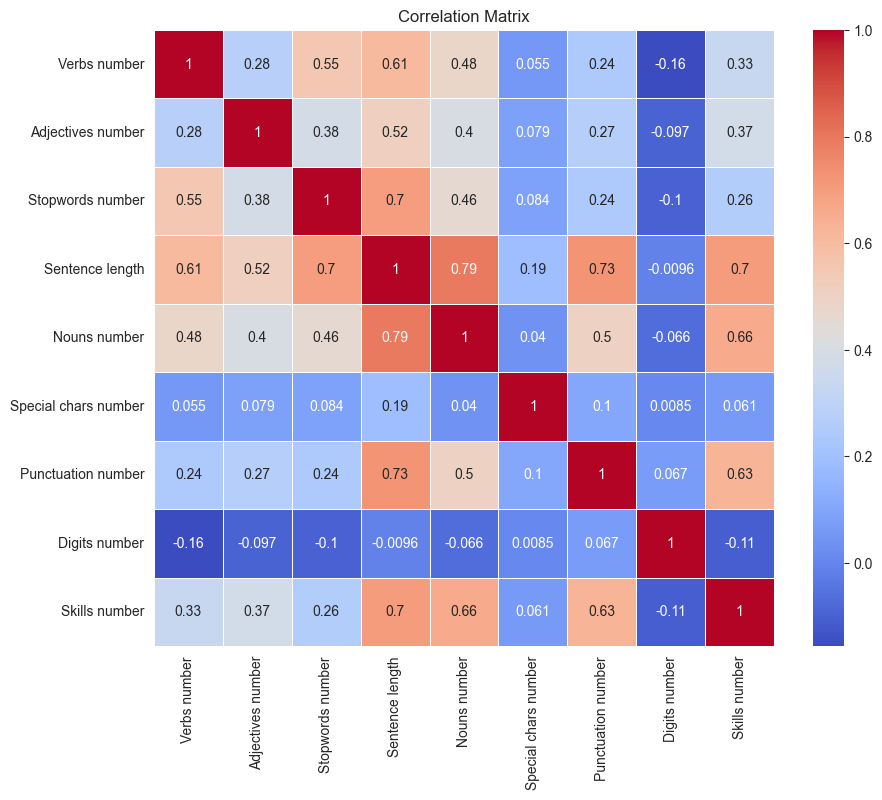

In [25]:
# Select only numeric columns
numeric_df = df_combined.select_dtypes(include=[np.number])

# Compute the correlation matrix for numeric columns
correlation_matrix = numeric_df.corr()

# Display the correlation matrix
print(correlation_matrix)

# Optional: Visualize the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


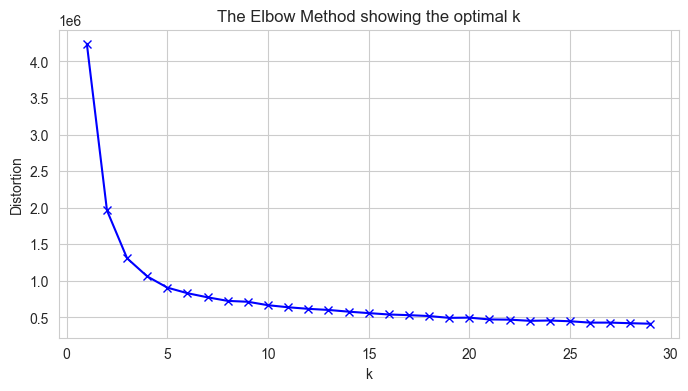

In [26]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import pandas as pd

# Supposons que df_combined est votre DataFrame
# Supprimer les colonnes non numériques et les lignes contenant des valeurs nulles
df_numeric = df_combined.drop(columns=["experiences", "IsExperience"])

# Supprimer les valeurs nulles (lignes avec des NaN)
df_numeric = df_numeric.dropna()

# Si vous avez des colonnes catégorielles qui nécessitent un encodage, utilisez pd.get_dummies (One-Hot Encoding)
df_numeric = pd.get_dummies(df_numeric)

# Effectuer le clustering KMeans
distortions = []
K = range(1, 30)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(df_numeric)
    distortions.append(kmeanModel.inertia_)

# Afficher la méthode du coude
plt.figure(figsize=(8, 4))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()


In [27]:
df = df.drop(df[(df['IsExperience'] == 'YES') & ((df['Sentence length'] < 3) | (df['Sentence length'] > 28))].index)
df = df.drop(df[(df['IsExperience'] == 'YES') & (df['experiences'].str.contains("\?"))].index)
df.shape
from sklearn.calibration import LabelEncoder

numeric_features = ['Verbs number', 'Adjectives number', 'Stopwords number', 'Sentence length', 
                    'Nouns number', 'Special chars number', 'Punctuation number', 'Digits number', 'Skills number']
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler()), 
    ('pca', PCA(n_components=2))
])

categorical_features = ['experiences']   
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

X = df.drop('IsExperience', axis=1)
y = df['IsExperience']
X_transformed = preprocessor.fit_transform(X)
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
y=y_encoded

<>:2: SyntaxWarning: invalid escape sequence '\?'
<>:2: SyntaxWarning: invalid escape sequence '\?'
C:\Users\khmir\AppData\Local\Temp\ipykernel_15704\2988274084.py:2: SyntaxWarning: invalid escape sequence '\?'
  df = df.drop(df[(df['IsExperience'] == 'YES') & (df['experiences'].str.contains("\?"))].index)


In [28]:


classifiers = {
    'SVM': SVC(),
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'KNN': KNeighborsClassifier()
}
 
X_train, X_test, y_train, y_test = train_test_split(X_transformed, y, test_size=0.2, random_state=np.random.randint(1000))




SVM accuracy: 0.9550682000534902
[[1830  110]
 [  58 1741]]
              precision    recall  f1-score   support

           0       0.97      0.94      0.96      1940
           1       0.94      0.97      0.95      1799

    accuracy                           0.96      3739
   macro avg       0.95      0.96      0.96      3739
weighted avg       0.96      0.96      0.96      3739

----------------------------------------------------------
Logistic Regression accuracy: 0.9355442631719711
[[1799  141]
 [ 100 1699]]
              precision    recall  f1-score   support

           0       0.95      0.93      0.94      1940
           1       0.92      0.94      0.93      1799

    accuracy                           0.94      3739
   macro avg       0.94      0.94      0.94      3739
weighted avg       0.94      0.94      0.94      3739

----------------------------------------------------------
Random Forest accuracy: 0.9818133190692698
[[1872   68]
 [   0 1799]]
              precisio

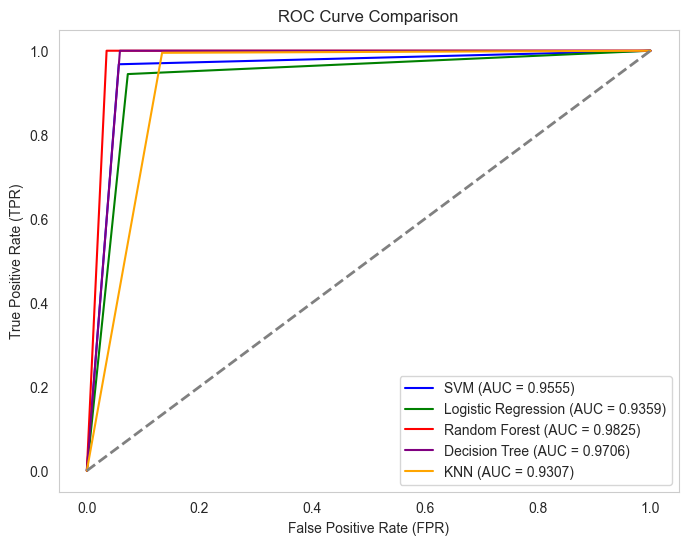

In [29]:
plt.figure(figsize=(8, 6))  # Adjust figure size as needed

# Define unique colors for each model (replace with desired palette if necessary)
colors = ['blue', 'green', 'red', 'purple', 'orange'] 
for i, (name, classifier) in enumerate(classifiers.items()):
    model = classifier.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{name} accuracy: {accuracy}")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print("----------------------------------------------------------")
    fpr, tpr, _ = roc_curve(y_test, y_pred)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, color=colors[i], label=f'{name} (AUC = {roc_auc:.4f})')

# Add common plot elements
plt.title('ROC Curve Comparison')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')  # Adding diagonal line

plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.legend(loc='lower right')
plt.grid(False)
plt.show()

[[1830  110]
 [  58 1741]]


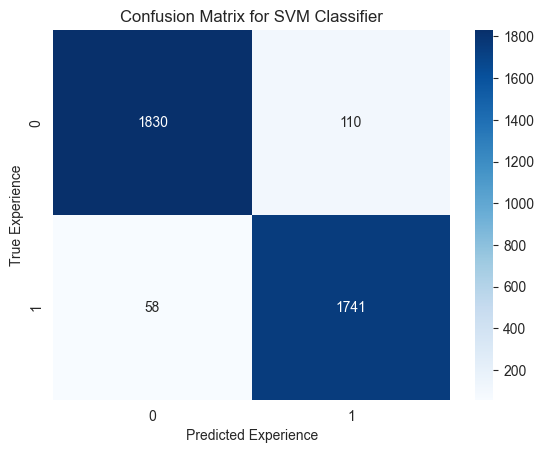

In [30]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix

# Initialize SVM classifier
svm_classifier = SVC()

# Train the SVM classifier
svm_model = svm_classifier.fit(X_train, y_train)

# Predict on the test set
y_pred_svm = svm_model.predict(X_test)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred_svm)
print(cm)
sns.heatmap(cm, annot=True, cmap="Blues", fmt=".0f")
plt.xlabel("Predicted Experience")
plt.ylabel("True Experience")
plt.title("Confusion Matrix for SVM Classifier")
plt.show()
 
